In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Đọc dữ liệu
file_path = "10kmau2014.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9266 non-null   int64  
 1   dantoc           9266 non-null   int64  
 2   tsnguoi          9266 non-null   int64  
 3   thunhap          9266 non-null   float64
 4   chitieu          9266 non-null   float64
 5   chichonangluong  9266 non-null   int64  
 6   chitiendien      9266 non-null   int64  
 7   dienticho        9266 non-null   int64  
 8   chatluongnhao    9266 non-null   int64  
 9   tiepcandienluoi  9266 non-null   int64  
 10  chitiendienbq    9266 non-null   float64
 11  thunhapbq        9266 non-null   float64
 12  chinangluongbq   9266 non-null   float64
 13  chitieubq        9266 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 1013.6 KB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongnhao,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,2,367038.0,80682.0,10152,7800,22,3,1,3900.0,183519.0000,5076.0,40341.00000
1,1,1,2,132207.0,52854.0,12456,9000,110,3,1,4500.0,66103.5000,6228.0,26427.00000
2,1,1,5,1014522.0,794160.0,40295,12600,190,3,1,2520.0,202904.4000,8059.0,158832.00000
3,1,1,3,521050.0,88481.0,10350,7200,100,3,1,2400.0,173683.3333,3450.0,29493.66667
4,1,1,5,740391.0,294576.0,22325,12000,100,3,1,2400.0,148078.2000,4465.0,58915.20000


In [5]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt               0
dantoc             0
tsnguoi            0
thunhap            0
chitieu            0
chichonangluong    0
chitiendien        0
dienticho          0
chatluongnhao      0
tiepcandienluoi    0
chitiendienbq      0
thunhapbq          0
chinangluongbq     0
chitieubq          0
dtype: int64


In [7]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.111587,0.192593,1.0,0.333904,0.251349,0.011889,0.023602,0.083333,1.0,0.0,0.014113
1,0.136912,0.222222,1.0,0.385274,0.308393,0.004224,0.008269,0.083333,1.0,0.0,0.102823
2,0.442909,0.311111,1.0,0.215753,0.399059,0.033022,0.026134,0.333333,1.0,0.0,0.183468
3,0.113764,0.177778,1.0,0.205479,0.170834,0.016916,0.022318,0.166667,1.0,0.0,0.092742
4,0.245389,0.296296,1.0,0.205479,0.221094,0.024075,0.018974,0.333333,1.0,0.0,0.092742


In [9]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


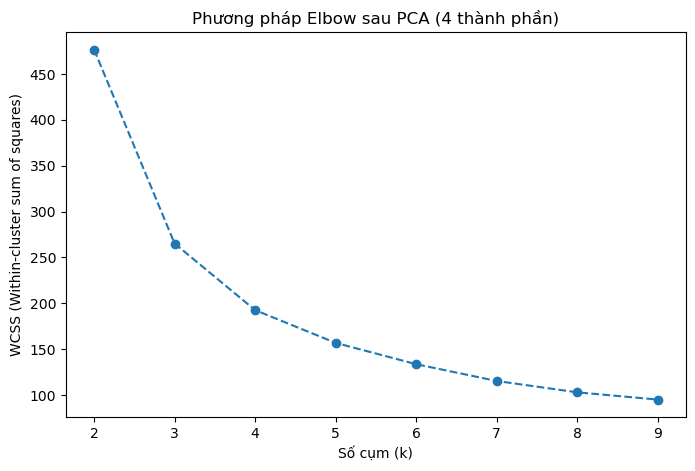

In [11]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

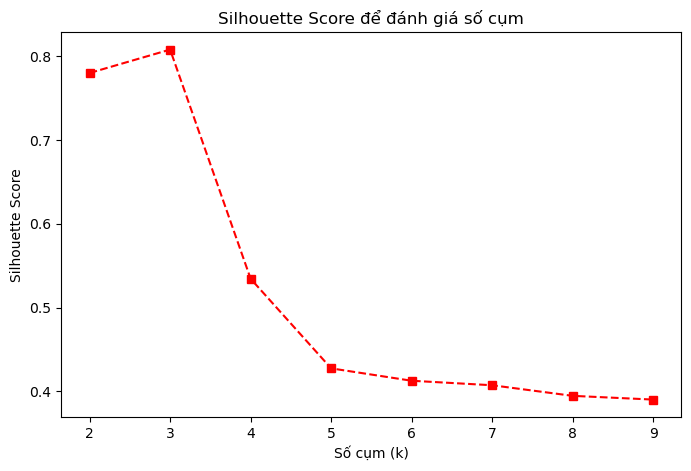

In [13]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [17]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6428
1    2624
2     214
Name: count, dtype: int64


In [19]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                5187.885345  1824.131145         1.000000     528.546971   
1                9184.427973  3713.578506         0.999619    1041.372199   
2                3522.130841   152.186916         0.000000      47.418725   

             chinangluongbq        thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                    
0               1323.315017  208884.416584  56041.754586  3.799782  0.000000   
1               2324.265111  357670.715701  96771.261997  3.812881  1.000000   
2                734.797230   76965.359813  20176.794245  4.710280  0.004673   

               dantoc  dienticho  
Cluster_PCA                       
0            2.429216  76.333385  
1            1.435595  93.619284  
2            9.000000  62.084112  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6428
1    2624
2     214
Name: count, dtype: int64


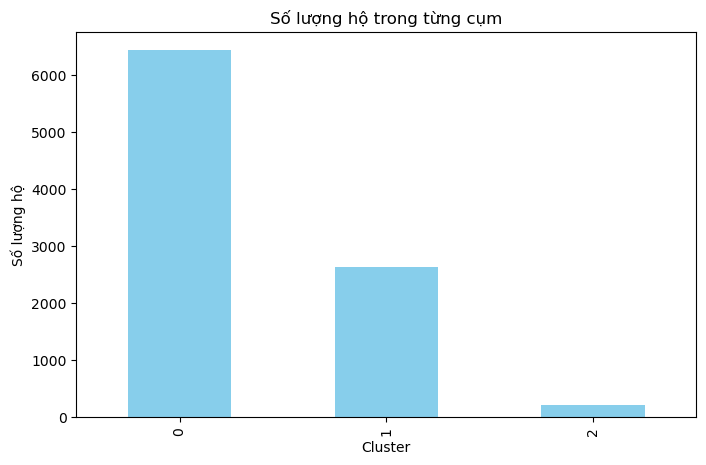

In [21]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap     thunhapbq       chitieu     chitieubq
Cluster_PCA                                                         
0            208884.416584  56041.754586  61056.917750  16056.770356
1            357670.715701  96771.261997  84738.702439  22006.113623
2             76965.359813  20176.794245  61346.399065  13558.328076


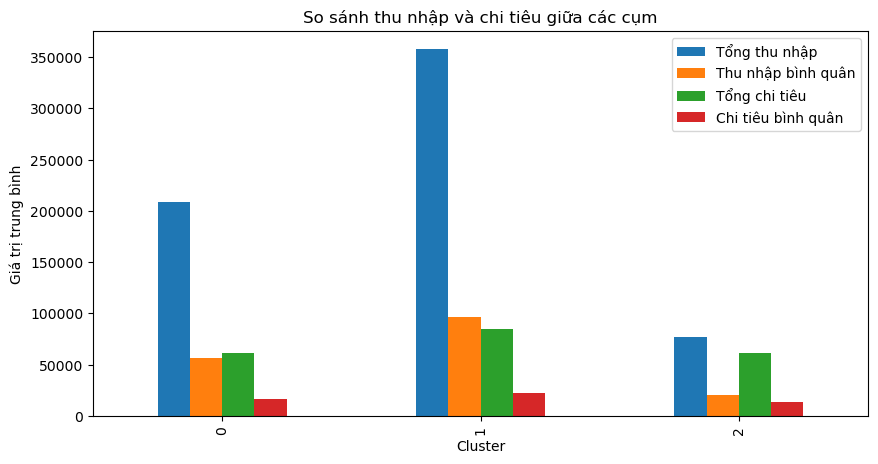

In [23]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                5187.885345     1323.315017  1824.131145     528.546971
1                9184.427973     2324.265111  3713.578506    1041.372199
2                3522.130841      734.797230   152.186916      47.418725


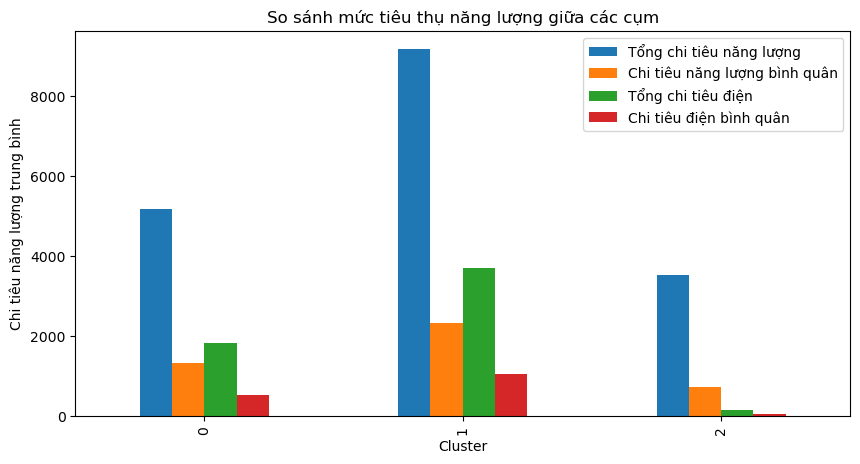

In [25]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    100.00000
1     99.96189
2      0.00000
Name: tiepcandienluoi, dtype: float64


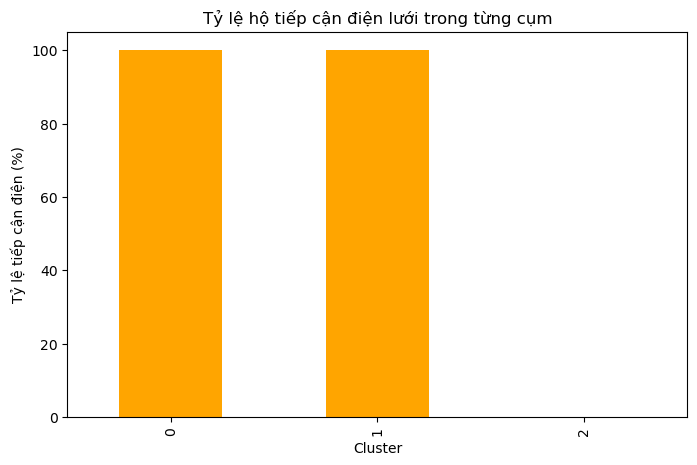

In [27]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0    0.0
1    0.0
2    0.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.00000
1      0.00000
2     99.53271
Name: ttnt, dtype: float64


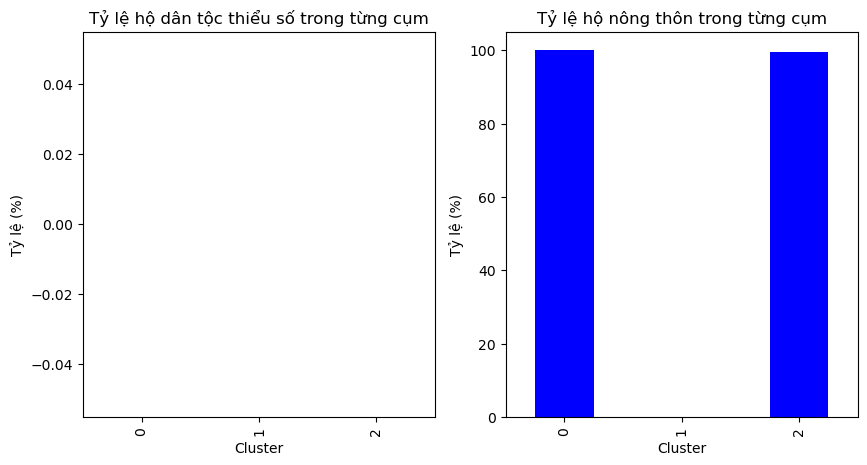

In [29]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            3.799782  76.333385
1            3.812881  93.619284
2            4.710280  62.084112


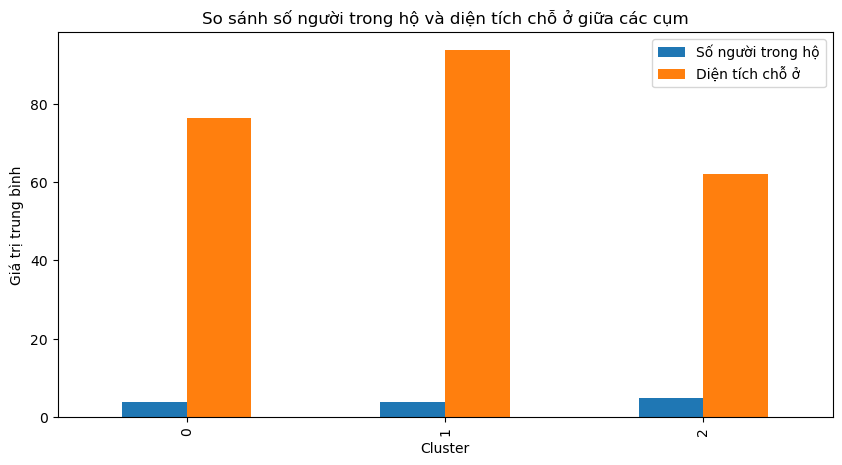

In [31]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()